In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = l2_regularizer,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.9259259259259259, Loss: 0.37944821958188657
Checkpoint 200, Accuracy: 0.9382716049382716, Loss: 0.3361209233601888
Checkpoint 300, Accuracy: 0.9506172839506173, Loss: 0.3316319430315936
Checkpoint 400, Accuracy: 0.9506172839506173, Loss: 0.3252026946456344
Checkpoint 500, Accuracy: 0.9506172839506173, Loss: 0.3252026946456344


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.8071358  0.04062832 0.15223593]
[0. 0. 1.] <-> [0.25897488 0.01104423 0.72998095]
[1. 0. 0.] <-> [0.7631345  0.05703324 0.17983222]
[0. 1. 0.] <-> [0.2822603  0.70759434 0.01014543]
[1. 0. 0.] <-> [0.7360891  0.22032593 0.04358498]
[1. 0. 0.] <-> [0.7574767  0.19287021 0.04965313]
[1. 0. 0.] <-> [0.8249312  0.08869103 0.08637781]
[1. 0. 0.] <-> [0.8188506  0.08753305 0.09361637]
[0. 1. 0.] <-> [0.2037476  0.7897455  0.00650692]
[1. 0. 0.] <-> [0.8183562  0.05550588 0.12613788]
[0. 0. 1.] <-> [0.32080644 0.01589875 0.6632948 ]
[1. 0. 0.] <-> [0.7206124  0.05792581 0.22146179]
[0. 1. 0.] <-> [0.524378   0.45125544 0.02436653]
[0. 1. 0.] <-> [0.20115283 0.7926046  0.00624254]
[1. 0. 0.] <-> [0.80460185 0.11874826 0.0766499 ]
[1. 0. 0.] <-> [0.8059472  0.06858016 0.12547256]
[1. 0. 0.] <-> [0.81113726 0.04636757 0.14249507]
[1. 0. 0.] <-> [0.8158592  0.10934123 0.07479957]
[1. 0. 0.] <-> [0.82034135 0.11033884 0.06931978]
[0. 0. 1.] <-> [0.2742234  0.01181124 0.7139654 ]


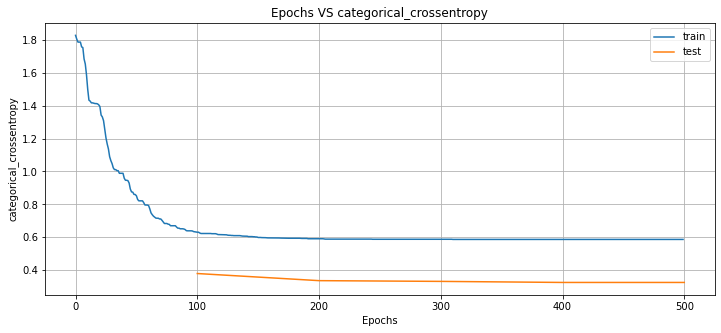

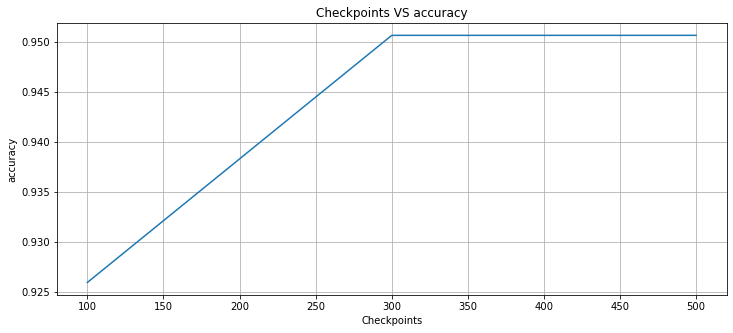

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9259259259259259, 'mean_square_error': 0.18908672605328045, 'categorical_crossentropy': 0.37944821958188657, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 0}, 1: {'tp_hit': 6, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 9}, 2: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 3}}, 'checkpoint': 100} 


{'accuracy': 0.9382716049382716, 'mean_square_error': 0.16054273839407215, 'categorical_crossentropy': 0.3361209233601888, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 10, 'tn_hit': 18, 'fn_hit': 0}, 1: {'tp_hit': 8, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 7}, 2: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 3}}, 'checkpoint': 200} 


{'accuracy': 0.9506172839506173, 'mean_square_error': 0.158253464617519, 'categorical_crossentropy': 0.3316319430315936, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 8, 'tn_hit': 20, 'fn_hit': 0}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 5}, 2: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 95, 'fn

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[-0.30674595  0.78486115  0.05973938 -0.8897828  -1.0749155 ]
 bias: 0.7479410767555237

Neuron 1: weights:
[-4.0011448e-01  9.6954918e-01  5.1009941e-01 -8.0867944e-04
 -7.4740872e-02]
 bias: -0.40086087584495544

Neuron 2: weights:
[ 0.56411856 -1.2630621  -0.7663879  -0.20609005  0.2443969 ]
 bias: 0.7079600095748901

Neuron 3: weights:
[ 0.27176118 -0.64647996 -0.3639063   0.49609846  0.66664886]
 bias: -0.26785093545913696

$
Layer 2
Neuron 0: weights:
[ 1.2321928  -0.66294646  1.080626   -0.41034007]
 bias: 0.20496907830238342

Neuron 1: weights:
[ 0.5501243   1.5312154  -1.7944582  -0.82717705]
 bias: 0.13687850534915924

Neuron 2: weights:
[-1.8573798 -0.7556708  0.8407114  1.290305 ]
 bias: -0.21244414150714874

$

